Example taken from this [article](http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know)

### Word Cloud from an Excel file

Warning message:
In read_xlsx_(path, sheet, col_names = col_names, col_types = col_types, : [158, 13]: expecting numeric: got 'WAIT FOR PART -(01/16/13 RM)    SUPPLIER CONFIRMED SAME ROOT CAUSE AND C/M AS 13M ACCORD QIS FOR INCORRECT DEFROST LINKAGE. -(02/12/13 RM)'

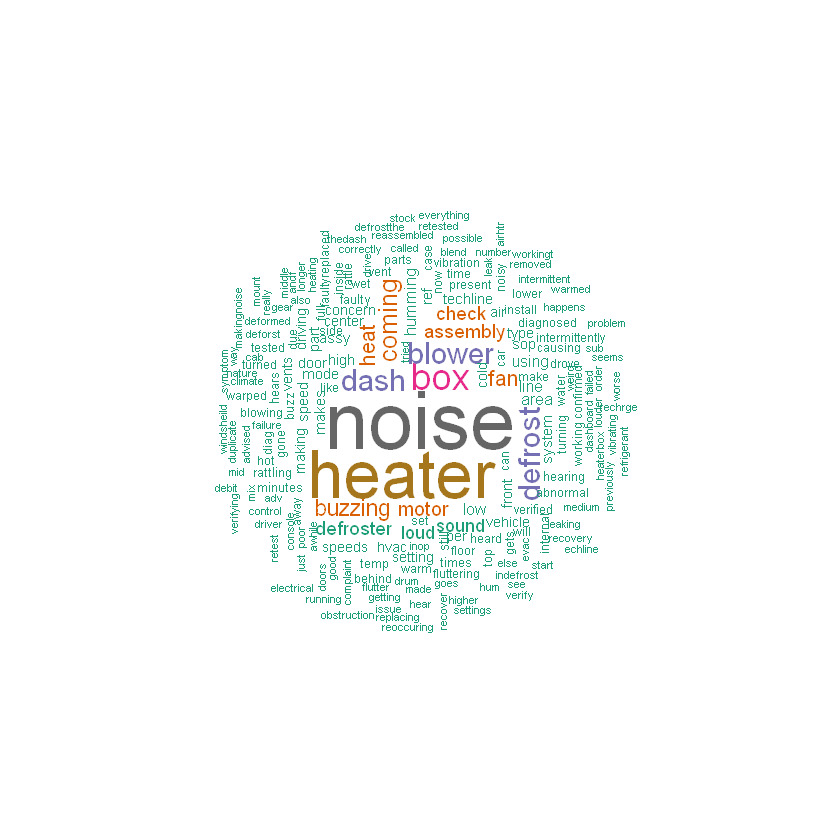

In [28]:
library(readxl)
library(tm)
library(wordcloud)
library(SnowballC)

library(choroplethr)
contention = read_excel("d:/temp/heater_sub_assy.xlsx", sheet = "Claims")

doc.corpus <- Corpus(VectorSource(contention$CUSTOMER_CONTENTION_TEXT))
cleaned <- tm_map(doc.corpus,stripWhitespace)
cleaned <- tm_map(cleaned, content_transformer(tolower))
cleaned <- tm_map(cleaned,removeWords,stopwords("english"))
#cleaned <- tm_map(cleaned,stemDocument)
cleaned <- tm_map(cleaned,removeNumbers)
cleaned <- tm_map(cleaned,removePunctuation)

# Remove "worthless" words
cleaned <- tm_map(cleaned,removeWords, "customer")
cleaned <- tm_map(cleaned,removeWords, "cust")
cleaned <- tm_map(cleaned,removeWords, "client")
cleaned <- tm_map(cleaned,removeWords, "replace")
cleaned <- tm_map(cleaned,removeWords, "replaced")
cleaned <- tm_map(cleaned,removeWords, "repl")
cleaned <- tm_map(cleaned,removeWords, "states")
cleaned <- tm_map(cleaned,removeWords, "perform")
cleaned <- tm_map(cleaned,removeWords, "performed")
cleaned <- tm_map(cleaned,removeWords, "checked")
cleaned <- tm_map(cleaned,removeWords, "found")
cleaned <- tm_map(cleaned,removeWords, "advise")
cleaned <- tm_map(cleaned,removeWords, "inspect")
cleaned <- tm_map(cleaned,removeWords, "inspected")
cleaned <- tm_map(cleaned,removeWords, "tech")
cleaned <- tm_map(cleaned,removeWords, "technician")
cleaned <- tm_map(cleaned,removeWords, "new")
cleaned <- tm_map(cleaned,removeWords, "test")
cleaned <- tm_map(cleaned,removeWords, "please")

dtm <- TermDocumentMatrix(cleaned)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

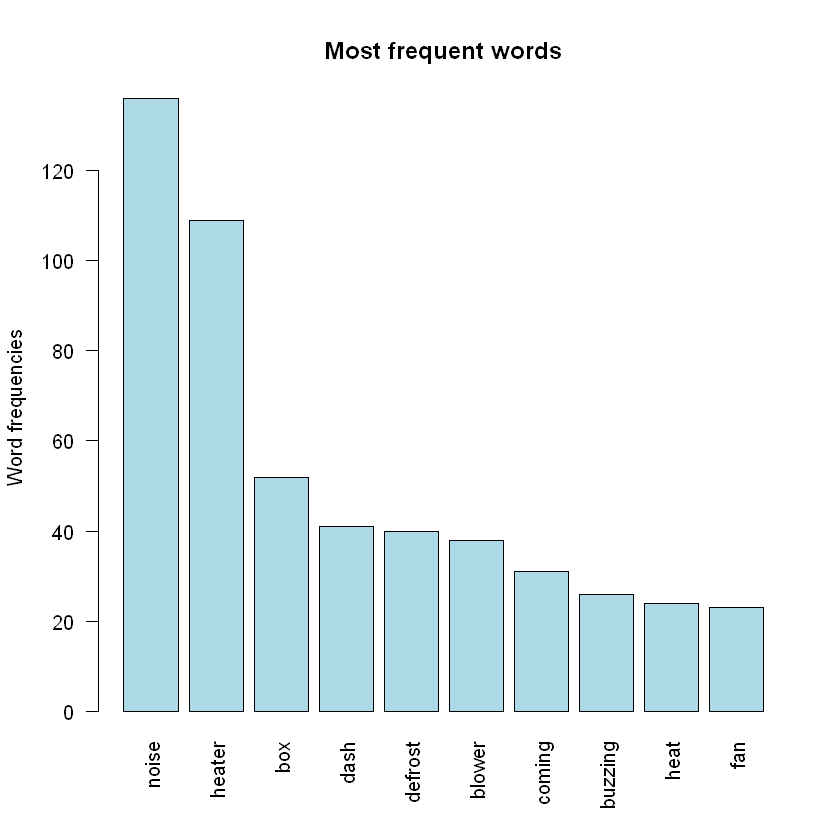

In [29]:
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

### Word Cloud from a text file

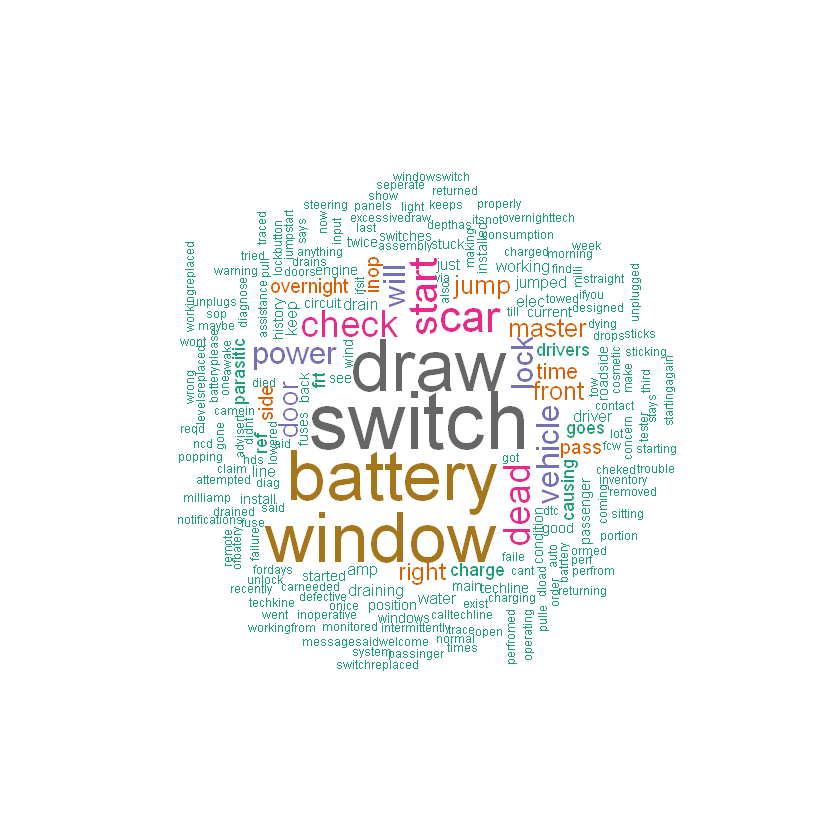

In [30]:
library(tm)
library(wordcloud)
library(SnowballC)

contents <- readLines('d:/temp/wordcloud/contention.txt')
doc.vec <- VectorSource(contents)
doc.corpus <- Corpus(doc.vec)
cleaned <- tm_map(doc.corpus,stripWhitespace)
cleaned <- tm_map(cleaned, content_transformer(tolower))
cleaned <- tm_map(cleaned,removeWords,stopwords("english"))
#cleaned <- tm_map(cleaned,stemDocument)
cleaned <- tm_map(cleaned,removeNumbers)
cleaned <- tm_map(cleaned,removePunctuation)

# Remove "worthless" words
cleaned <- tm_map(cleaned,removeWords, "customer")
cleaned <- tm_map(cleaned,removeWords, "cust")
cleaned <- tm_map(cleaned,removeWords, "client")
cleaned <- tm_map(cleaned,removeWords, "replace")
cleaned <- tm_map(cleaned,removeWords, "replaced")
cleaned <- tm_map(cleaned,removeWords, "repl")
cleaned <- tm_map(cleaned,removeWords, "states")
cleaned <- tm_map(cleaned,removeWords, "perform")
cleaned <- tm_map(cleaned,removeWords, "performed")
cleaned <- tm_map(cleaned,removeWords, "checked")
cleaned <- tm_map(cleaned,removeWords, "found")
cleaned <- tm_map(cleaned,removeWords, "advise")
cleaned <- tm_map(cleaned,removeWords, "inspect")
cleaned <- tm_map(cleaned,removeWords, "inspected")
cleaned <- tm_map(cleaned,removeWords, "tech")
cleaned <- tm_map(cleaned,removeWords, "technician")
cleaned <- tm_map(cleaned,removeWords, "new")
cleaned <- tm_map(cleaned,removeWords, "test")
cleaned <- tm_map(cleaned,removeWords, "please")

dtm <- TermDocumentMatrix(cleaned)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

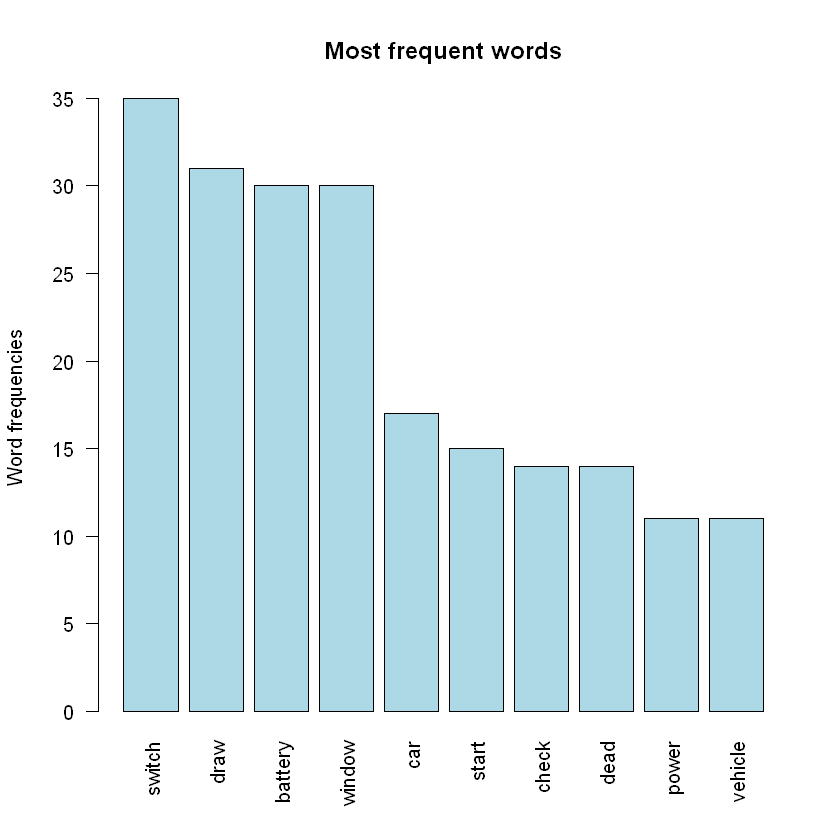

In [31]:
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

In [32]:
library(tm)
library(wordcloud)
library(SnowballC)

contents <- readLines('d:/temp/i_have_a_dream.txt')
doc.vec <- VectorSource(contents)
doc.corpus <- Corpus(doc.vec)
#xkcd.df <- read.csv(file.path(path, datafiles))
#xkcd.corpus <- Corpus(DataframeSource(data.frame(xkcd.df[, 3])))
cleaned <- tm_map(doc.corpus,stripWhitespace)
cleaned <- tm_map(cleaned, content_transformer(tolower))
cleaned <- tm_map(cleaned,removeWords,stopwords("english"))
#cleaned <- tm_map(cleaned,stemDocument)
cleaned <- tm_map(cleaned,removeNumbers)
cleaned <- tm_map(cleaned,removePunctuation)

dtm <- TermDocumentMatrix(cleaned)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

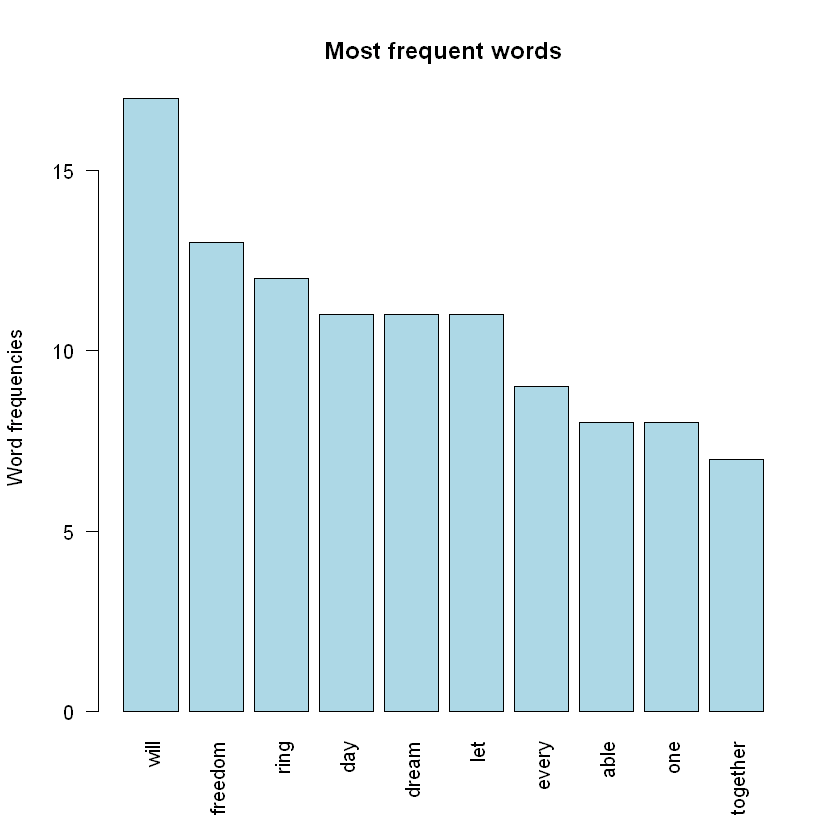

In [33]:
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

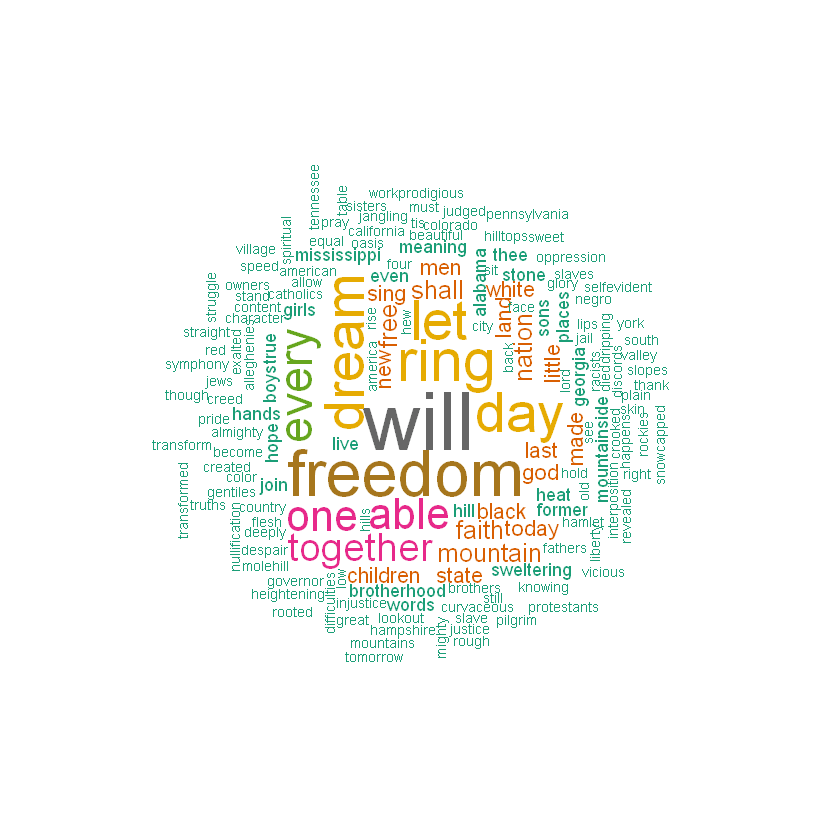

In [34]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))